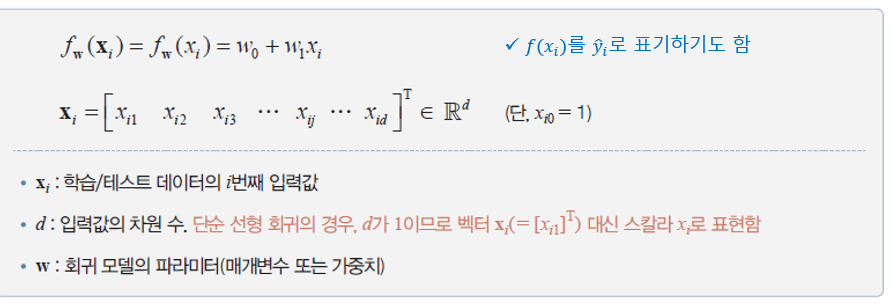

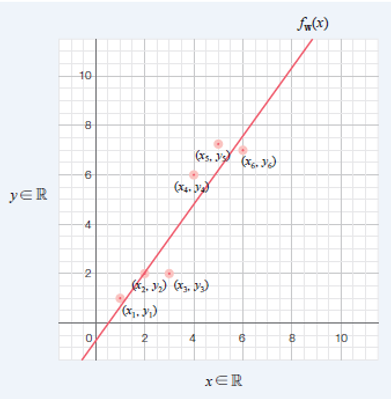

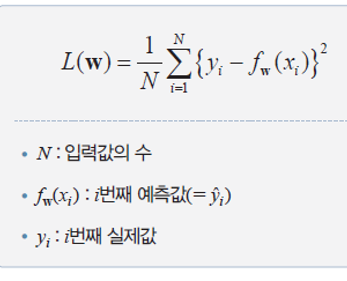

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # 데이터분리(학습용/테스트)
from sklearn.linear_model import LinearRegression # 모델 - 선형모델
from sklearn.metrics import mean_squared_error, r2_score # 평가

In [1]:
url = 'https://raw.githubusercontent.com/leeky20240624/pythone/main/2%EA%B0%9C%EC%9B%94/3%EC%A3%BC%EC%B0%A8/Salary_Data.csv'

In [4]:
# 데이터 불러오기
df = pd.read_csv(url)
# 데이터확인
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# 결측치여부 및 데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
# 모델객체 만들기
lr = LinearRegression()
# 학습하기
lr.fit(x_train,y_train)
w_1 = lr.coef_  # 선형계수
w_0 = lr.intercept_  # 절편
print("선형계수:",w_1)
print("절편:",w_0)
print("테스트의 첫번째 값을 예측",x_test.iloc[0,0]*w_1 + w_0)
y_predict = lr.predict(x_test)
print("모델이 예측한 테스트의 첫번째 값",y_predict[0])

선형계수: [9332.94473799]
절편: 25609.89799835482
테스트의 첫번째 값을 예측 [75074.50510972]
모델이 예측한 테스트의 첫번째 값 75074.50510971624


In [16]:
# 모델 성능평가
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predict)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 51338023.49224842
rmse: 7165.055721503387
r2: 0.7616681465472094


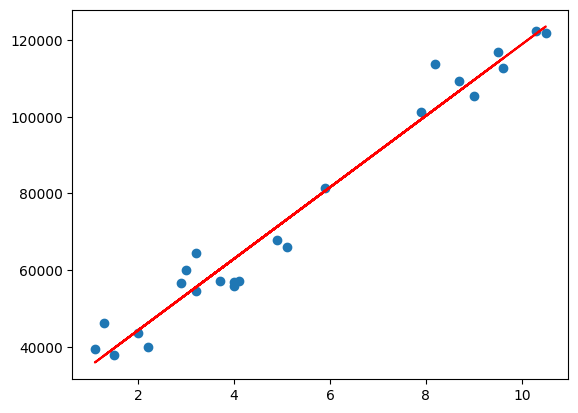

In [19]:
# 모델 동작을 시각화
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='red')
plt.show()

# 함수를 직접구현한 선형모델

In [75]:
# 데이터불러오기
# 데이터 분할(학습/테스트)
X = df.iloc[:,:-1].to_numpy()  # 중요.. 계산중에 에러방지를 위해서 넘파이형태로 변환
y = df.iloc[:,-1].to_numpy()
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=1)

In [76]:
# 모델구성
# 1. 가중치 초기화
w_1 = 10 # 선형 계수(하나라는 것은 독립변수가 한개)
w_0 = 10 # 편향
learning_rate=0.0025
# 선형 모델
def linear_legression(X):
  return w_1*X + w_0
# 오차함수(손실함수)
def mean_squared_error_loss(y_pred,y):
  return (y_pred-y)**2

# 경사하강법을 적용한 함수
def gradient_descent(X,y,y_pred):
  global w_1,w_0
  w_1 = w_1 - learning_rate*2*X*(y_pred-y)
  w_0 = w_0 - learning_rate*2*(y_pred-y)

# 모델 학습
for epoch in range(100):
  for x,y in zip(x_train,y_train):
    y_pred = linear_legression(x)  # 모델의 예측값
    gradient_descent(x,y,y_pred) # 경사하강법 적용해서 가중치를 업데이트

In [77]:
# 최종 가중치
w_1, w_0

(array([9393.66127716]), array([24226.38688257]))

In [38]:
# 모델 평가
y_predict = linear_legression(x_test)
mese_data = mean_squared_error(y_test,y_predict)
rmse_data = np.sqrt(mese_data)
r2_data = r2_score(y_test,y_predict)
print("mse:",mese_data)
print("rmse:",rmse_data)
print("r2:",r2_data)

mse: 60408982.32670221
rmse: 7772.321553223477
r2: 0.7195570895849996


# 머신러닝
  - 정의 : 기계학습
  - 수학적 정의 : 방정식의 해를 구함
    - x와 y가 주어졌을때 a,b의 값을 구함
    - y = ax+b

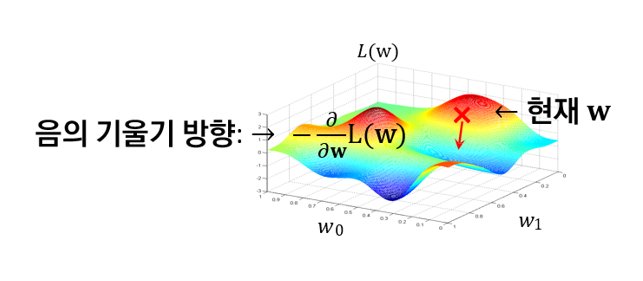

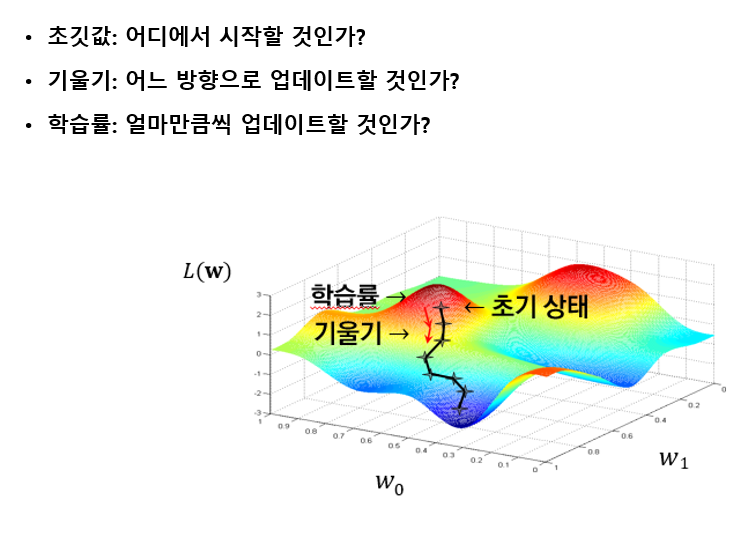

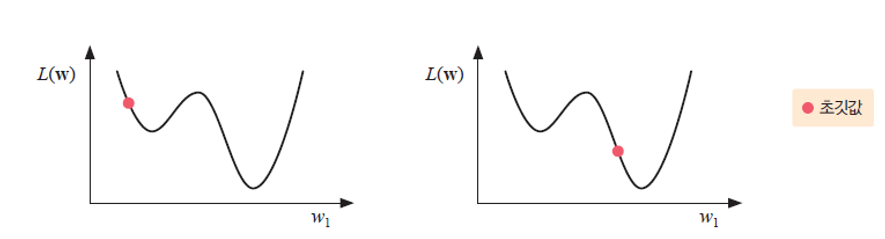

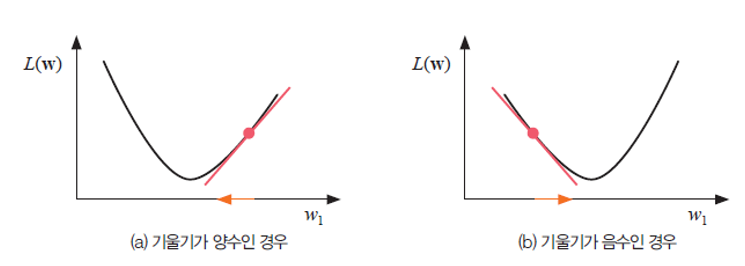

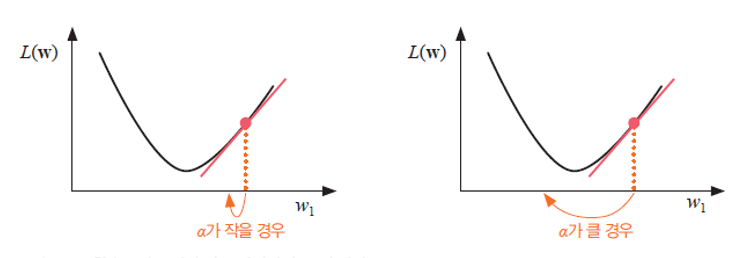

# 다중선형
  - x가 여러개

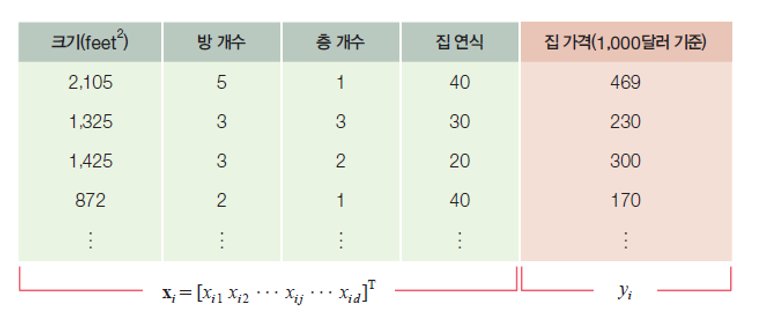

# 코드로 구현하는 미분
  - 순간적인 기울기
  - 접점의 기울기  
  - 손실값을 최소로 하기위한 가중치 업데이트


  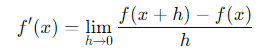

In [45]:
# 수치미분을 구현
def numerical_derivative(f, x, h=1e-5):
    return( f(x+h) - f(x)) / h

# y = x^2
def f(x):
  return x**2

# x=3일때 미분
result = numerical_derivative(f, 3)
print(result)

6.000009999951316


In [50]:
# 심볼릭 미분
import sympy as sp
# 변수를 정의 'x'
x = sp.symbols('x')
# 함수 f = x^2
f = x**2
# 미분
f_prime = sp.diff(f, x)
print(f_prime)

# x=3일때 미분값
f_prime.subs(x,3)

2*x


6

# 다중선형 코드로구현

In [78]:
titanic = pd.read_csv('https://raw.githubusercontent.com/leeky20240624/pythone/main/2%EA%B0%9C%EC%9B%94/3%EC%A3%BC%EC%B0%A8/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
# 수치형 컬럼추출
numeric_feature = titanic.describe().columns
numeric_titanic = titanic[numeric_feature]
numeric_titanic.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [80]:
# 가중치 초기화
# 학습률(learning_rate), 학습횟수(epoch)
# 선형회귀 함수(y = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + b)
# 손실함수 : mse
# 경사하강법
# 학습 : 매번 학습할때마다 경사하강법에서 나온 미분값을 가중치에 업데이트

In [111]:
weights = np.array([10]*6).reshape(-1,1)

learning_rate = 0.01
bias = 0.01
epochs = 100
def f(x):  # 독립변수들의 집합
  return np.dot(x,weights) + bias

def loss_mse(y_pred,y):  # 손실함수
  return (y_pred - y)**2

# 손실함수에 대한 경사하강법  - 손실함수에대한 미분을 적용해서 가중치를 업데이트
def gradient_descent(x,y,y_pred):
  for idx in range(len(weights)):
    weights[idx] = weights[idx] - learning_rate * 2*(y_pred - y) * x[idx]
  bias = bias - learning_rate * 2*(y_pred - y)

In [112]:
# 데이터 확보
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

In [113]:
data = X.iloc[:,:6].to_numpy()
target = y.to_numpy()

In [114]:
x_train,x_test,y_train,y_test =  train_test_split(data, target, test_size=0.2, random_state=42)

In [122]:
weights[0] - learning_rate * 2*(y_pred - y) * x[0]

,quality
0,-2960.037837
1,-2960.037837
2,-2960.037837
3,-2959.979837
4,-2960.037837
...,...
6492,-2959.979837
6493,-2960.037837
6494,-2959.979837
6495,-2959.921837


In [116]:
gradient_descent(x_train,y_train,f(x_train) )

ValueError: could not broadcast input array from shape (5197,6) into shape (1,)

In [117]:
weights.shape

(6, 1)

In [ ]:
import numpy as np

weights = np.array([10]*6).reshape(6, 1)  # (6,) -> (6, 1) 형태로 변환
learning_rate = 0.01
bias = 0.01
epochs = 100

def f(x):  # 독립변수들의 집합
    return np.dot(x, weights) + bias

def loss_mse(y_pred, y):  # 손실함수
    return (y_pred - y)**2

def gradient_descent(x, y, y_pred):
    global bias
    global weights
    # 가중치 업데이트
    weights -= learning_rate * 2 * np.dot(x.T, (y_pred - y)) / len(y)
    # 바이어스 업데이트
    bias -= learning_rate * 2 * np.sum(y_pred - y) / len(y)

# 예시로 x_train과 y_train 데이터 생성
x_train = np.random.rand(5197, 6)  # 5197개의 샘플, 6개의 특징(feature)
y_train = np.random.rand(5197, 1)  # 각 샘플에 대한 실제 값

# 경사하강법 적용
for _ in range(epochs):
    y_pred = f(x_train)
    gradient_descent(x_train, y_train, y_pred)
